<a href="https://colab.research.google.com/github/nurcanyaz/OpenCV_Dnn_Image_Classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **İmport the libraries**


In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# **Read an image**

In [9]:
# Load th input image
test_image = cv.imread("/content/drive/MyDrive/OpenCV DNN Image Classification/data/cat.jpeg")

In [10]:
test_image.shape

(1249, 1880, 3)

# **Load the class labels**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Split all the classes
with open("/content/drive/MyDrive/OpenCV DNN Image Classification/data/labels.txt","r") as label:
  names = label.read().split("\n")

In [13]:
# Print the class labels
names

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [14]:
# Split by comma after first space is found and grabb the first element and store it in a new list.
class_names = [name.split(",")[0] for name in names]

In [15]:
class_names

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

# **Initialize the DNN Module**


In [16]:
# prototxt:	It is the path to the .prototxt file, which is the text description of the architecture of the model.
# caffeModel: It is the path to the .caffemodel file, which is your actual trained neural network model, it contains all the weights/parameters of the model. This is usually several MBs in size.
# framework: Specifies the framework used for training the model. In this case, it's Caffe.

model = cv.dnn.readNet(model ="/content/drive/MyDrive/OpenCV DNN Image Classification/data/DenseNet_121.caffemodel",
                       config = "/content/drive/MyDrive/OpenCV DNN Image Classification/data/DenseNet_121.prototxt",
                       framework="Caffe")

# **Pre-process the image**

**Parameters:**

- **`Image`**  It is the input image that needs to be processed.

- **`Scalefactor`**  It is a value that is multiplied by the image, a value of 1 means no scaling is done. It is used to normalize the image

- **`Size`**  It is the size to which the image will be resized, depends upon each model.

- **`Mean`** These are the mean R, G, B Channel values from the whole dataset, and these are subtracted from the image's R, G, B respectively, this gives illumination invariance to the model.

- **`swapRB`** It is a Boolean flag (false by default) that indicates whether swap the first and last channels in the 3-channel image is necessary.

- **`crop`** It is a flag that indicates whether the image will be cropped after resize or not. If the `crop` is `True`, the input image is resized, so one side after resize is equal to the corresponding dimension in size and another one is equal or larger. Then, crop from the center is performed. If the `crop` is `False`, direct resize without cropping and preserving aspect ratio is performed.


In [17]:
blob = cv.dnn.blobFromImage(image= test_image,
                            scalefactor=0.01,
                            size=(224,224),
                            mean=(104,117,123))

In [18]:
# Passing the blob as input through the network
model.setInput(blob)

# It passes the model forward and returns the outputs.
outputs = model.forward()
# Reshapes the outputs.
outputs = outputs[0]
outputs = outputs.reshape(1000,1)

# It retrieves the index of the class with the highest probability among the outputs.
label_id = np.argmax(outputs)
# It gets the name of the predicted class
class_name = class_names[label_id]

In [19]:
class_name

'Egyptian cat'

In [20]:
"""
cv.putText(test_image, class_name, (20,30), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0))
cv2_imshow(test_image)
cv.waitKey(0)
cv.destroyAllWindows()
"""

'\ncv.putText(test_image, class_name, (20,30), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0))\ncv2_imshow(test_image)\ncv.waitKey(0)\ncv.destroyAllWindows()\n'

In [21]:
# Look at outputs
outputs

array([[-1.24907720e+00],
       [-1.21394396e+00],
       [ 2.27085304e+00],
       [ 9.53981638e-01],
       [ 7.86656499e-01],
       [ 1.93106949e+00],
       [-2.26395447e-02],
       [-1.60126770e+00],
       [-2.72446245e-01],
       [-3.04847503e+00],
       [-9.74072635e-01],
       [-1.34900951e+00],
       [-2.04782271e+00],
       [ 2.85629034e-01],
       [-4.02422523e+00],
       [ 4.51778919e-01],
       [ 2.35843945e+00],
       [ 2.20733333e+00],
       [-1.39151618e-01],
       [-1.93902993e+00],
       [ 1.01374352e+00],
       [ 3.19956660e+00],
       [-2.44211540e-01],
       [-1.66318703e+00],
       [ 4.69222832e+00],
       [-2.64055419e+00],
       [-9.65163708e-01],
       [ 6.35604441e-01],
       [ 8.32248386e-03],
       [-2.08489609e+00],
       [-2.51878023e+00],
       [-2.53513670e+00],
       [-2.78119564e+00],
       [-4.53513575e+00],
       [-3.24915791e+00],
       [-2.53826571e+00],
       [-1.12819421e+00],
       [-3.13255143e+00],
       [-4.1

In [22]:
# Takes the exponential function of the outputs
np.exp(outputs)

array([[2.86769301e-01],
       [2.97023535e-01],
       [9.68766117e+00],
       [2.59602547e+00],
       [2.19604182e+00],
       [6.89688206e+00],
       [9.77614760e-01],
       [2.01640740e-01],
       [7.61514366e-01],
       [4.74312007e-02],
       [3.77542317e-01],
       [2.59497136e-01],
       [1.29015505e-01],
       [1.33059883e+00],
       [1.78772695e-02],
       [1.57110465e+00],
       [1.05744371e+01],
       [9.09143925e+00],
       [8.70096087e-01],
       [1.43843427e-01],
       [2.75589848e+00],
       [2.45219002e+01],
       [7.83321917e-01],
       [1.89533964e-01],
       [1.09096016e+02],
       [7.13217333e-02],
       [3.80920827e-01],
       [1.88816309e+00],
       [1.00835729e+00],
       [1.24320045e-01],
       [8.05578083e-02],
       [7.92508870e-02],
       [6.19643778e-02],
       [1.07254507e-02],
       [3.88068743e-02],
       [7.90032968e-02],
       [3.23617131e-01],
       [4.36063968e-02],
       [6.58854187e-01],
       [6.11733273e-02],


In [23]:
# Convert the scores to class probabilities between 0-1 by applying softmax
probability = np.exp(outputs)/np.sum(np.exp(outputs))
probability

array([[2.76198449e-07],
       [2.86074709e-07],
       [9.33055617e-06],
       [2.50033122e-06],
       [2.11509177e-06],
       [6.64265053e-06],
       [9.41578094e-07],
       [1.94207900e-07],
       [7.33443528e-07],
       [4.56827998e-08],
       [3.63625418e-07],
       [2.49931588e-07],
       [1.24259756e-07],
       [1.28155057e-06],
       [1.72182801e-08],
       [1.51319091e-06],
       [1.01846445e-05],
       [8.75631213e-06],
       [8.38022743e-07],
       [1.38541097e-07],
       [2.65431095e-06],
       [2.36179785e-05],
       [7.54447228e-07],
       [1.82547396e-07],
       [1.05074534e-04],
       [6.86926853e-08],
       [3.66879391e-07],
       [1.81856194e-06],
       [9.71187433e-07],
       [1.19737379e-07],
       [7.75883038e-08],
       [7.63295560e-08],
       [5.96802607e-08],
       [1.03300906e-08],
       [3.73763811e-08],
       [7.60910908e-08],
       [3.11688012e-07],
       [4.19989838e-08],
       [6.34567641e-07],
       [5.89183671e-08],


In [24]:
# highest probability of prediction expressed as a percentage
probability = np.max(probability) * 100

In [25]:
probability

87.09150552749634

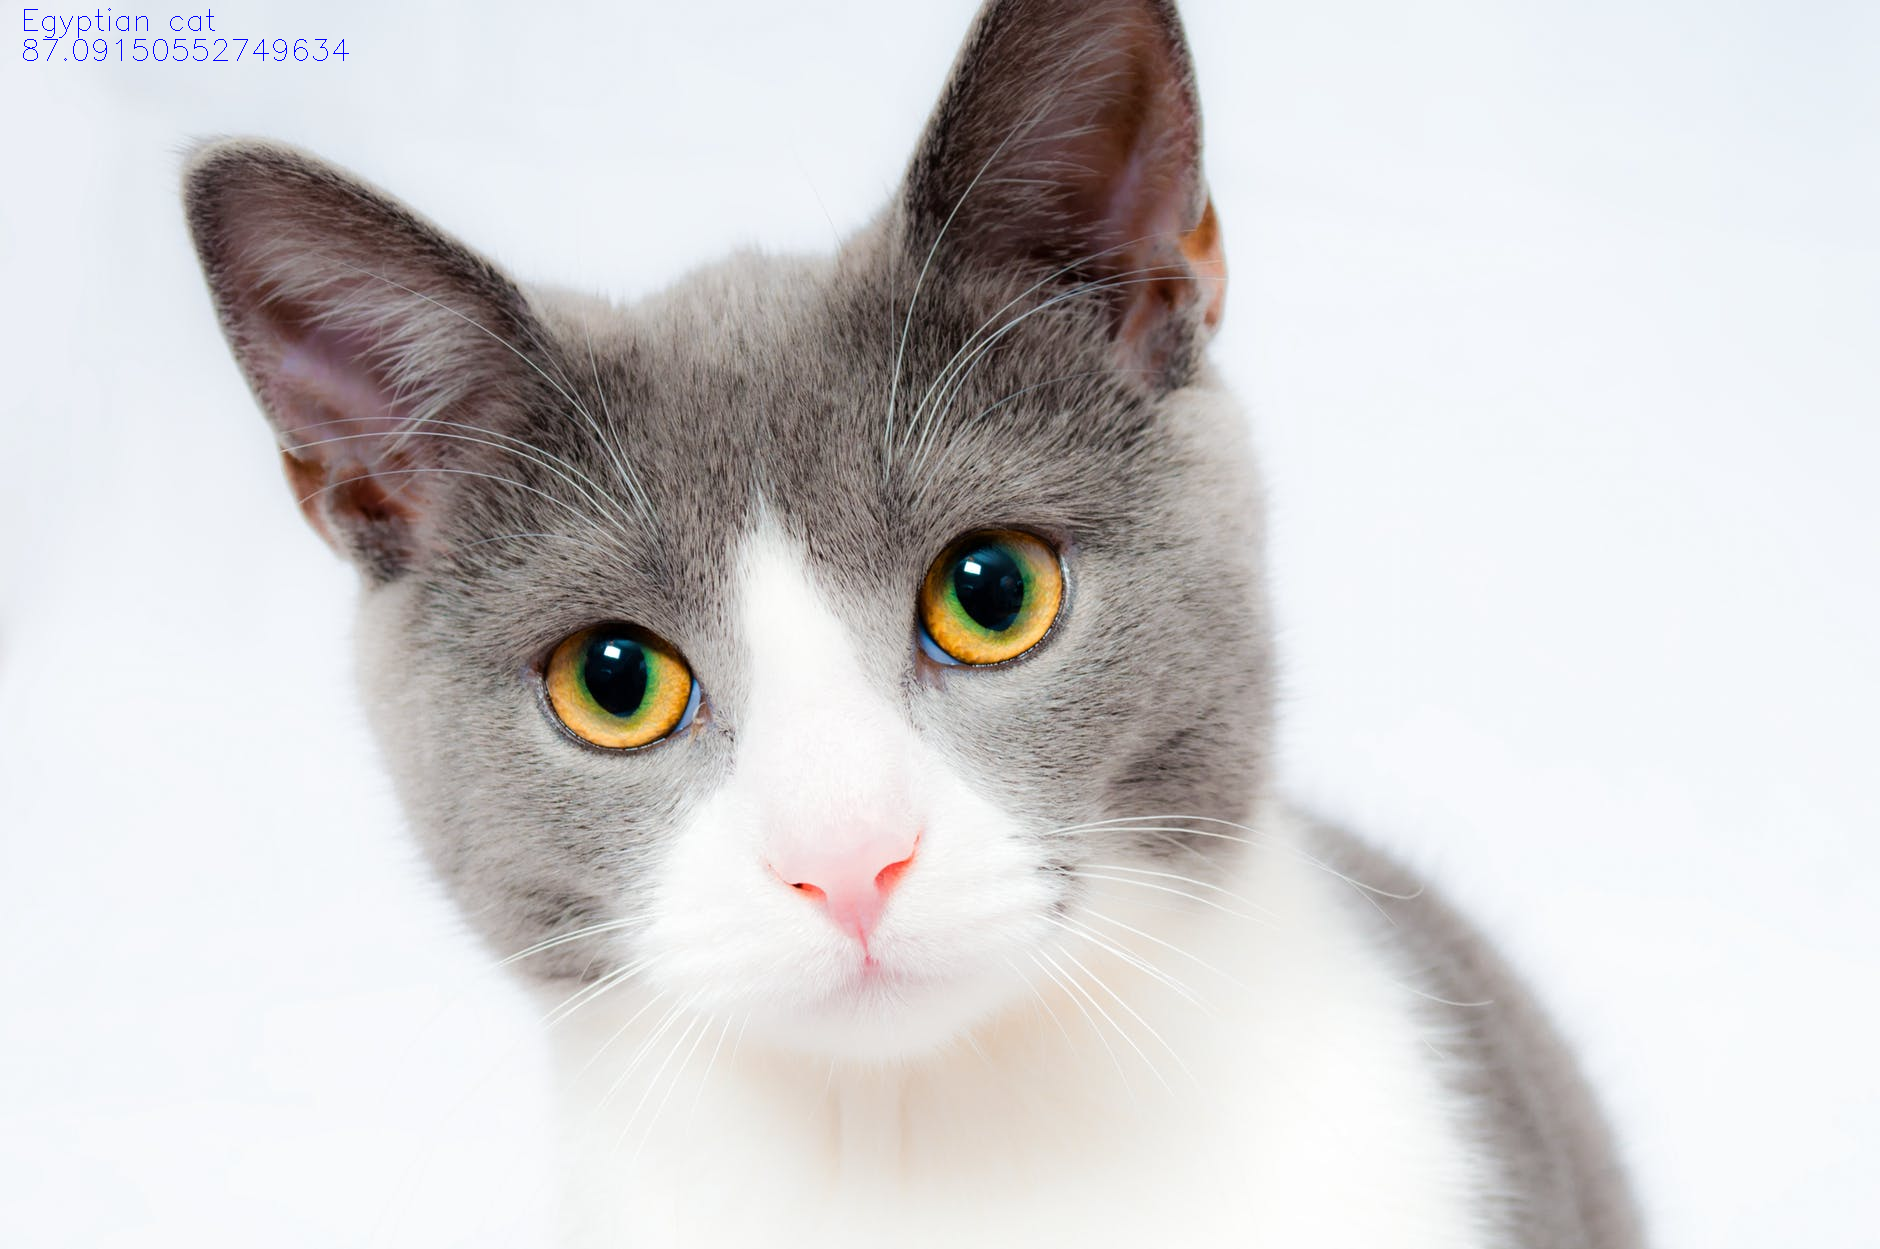

In [26]:
# Name of the Class with the maximum probability
cv.putText(test_image, class_name, (20,30), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0))
cv.putText(test_image, str(probability), (20,60), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0))
cv2_imshow(test_image)
cv.waitKey(0)
cv.destroyAllWindows()